# Can you find a better way to segment your customers?

## 📖 Background
You work for a medical device manufacturer in Switzerland. Your company manufactures orthopedic devices and sells them worldwide. The company sells directly to individual doctors who use them on rehabilitation and physical therapy patients.

Historically, the sales and customer support departments have grouped doctors by geography. However, the region is not a good predictor of the number of purchases a doctor will make or their support needs.

Your team wants to use a data-centric approach to segmenting doctors to improve marketing, customer service, and product planning. 

## 💾 The data

The company stores the information you need in the following four tables. Some of the fields are anonymized to comply with privacy regulations.

#### Doctors contains information on doctors. Each row represents one doctor.
- "DoctorID" - is a unique identifier for each doctor.
- "Region" - the current geographical region of the doctor.
- "Category" - the type of doctor, either 'Specialist' or 'General Practitioner.'
- "Rank" - is an internal ranking system. It is an ordered variable: The highest level is Ambassadors, followed by Titanium Plus, Titanium, Platinum Plus, Platinum, Gold Plus, Gold, Silver Plus, and the lowest level is Silver.
- "Incidence rate"  and "R rate" - relate to the amount of re-work each doctor generates.
- "Satisfaction" - measures doctors' satisfaction with the company.
- "Experience" - relates to the doctor's experience with the company.
- "Purchases" - purchases over the last year.

#### Orders contains details on orders. Each row represents one order; a doctor can place multiple orders.
- "DoctorID" - doctor id (matches the other tables).
- "OrderID" - order identifier.
- "OrderNum" - order number.
- "Conditions A through J" - map the different settings of the devices in each order. Each order goes to an individual patient.

#### Complaints collects information on doctor complaints.
- "DoctorID" - doctor id (matches the other tables).
- "Complaint Type" - the company's classification of the complaints.
- "Qty" - number of complaints per complaint type per doctor.

#### Instructions has information on whether the doctor includes special instructions on their orders.
- "DoctorID" - doctor id (matches the other tables).
- "Instructions" - 'Yes' when the doctor includes special instructions, 'No' when they do not.

In [2]:
suppressPackageStartupMessages(library(tidyverse))
doctors <- readr::read_csv('data/doctors.csv', show_col_types = FALSE)
doctors

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
AHDCBA,4 15,Specialist,Ambassador,49.00,0.90,53.85,1.20,49
ABHAHF,1 8 T4,General Practitioner,Ambassador,37.00,0.00,100.00,0.00,38
FDHFJ,1 9 T4,Specialist,Ambassador,33.00,1.53,--,0.00,34
BJJHCA,1 10 T3,Specialist,Ambassador,28.00,2.03,--,0.48,29
FJBEA,1 14 T4,Specialist,Ambassador,23.00,0.96,76.79,0.75,24
BCJCED,1 10,Specialist,Platinum Plus,19.00,1.20,-50.00,0.10,20
FCGIG,1 8 T3,Specialist,Titanium,18.00,1.68,--,0.26,19
HFIDE,1 11,Specialist,Ambassador,15.00,1.19,--,0.38,16
ICBGB,1 12,Specialist,Platinum Plus,15.00,0.81,--,0.25,16


In [3]:
orders <- readr::read_csv('data/orders.csv', show_col_types = FALSE)
orders

DoctorID,OrderID,OrderNum,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J
<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
ABJEAI,DGEJFDC,AIBEHCJ,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,Before
HBIEA,DGAJDAH,AIJIHGB,FALSE,TRUE,NA,FALSE,FALSE,TRUE,FALSE,TRUE,Before
GGCCD,DGBBDCB,AFEIHFB,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,NA
EHHGF,DGCDCCF,AIBJJEE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,Before
EHHGF,DGCFAGC,AEDBBDC,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,NA
EHHGF,DGDBJJC,AFIEHAA,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,NA
EHHGF,DHJCDJF,ABJEJHJ,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,NA
FCBDC,DGAIAHJ,AADBICE,FALSE,FALSE,NA,FALSE,FALSE,FALSE,FALSE,FALSE,NA
AABDHC,DEHCIAA,AHEIDCG,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,Before


In [4]:
complaints <- readr::read_csv('data/complaints.csv', show_col_types = FALSE)
complaints

DoctorID,Complaint Type,Qty
<chr>,<chr>,<dbl>
EHAHI,Correct,10
EHDGF,Correct,2
EHDGF,Unknown,3
EHDIJ,Correct,8
EHDIJ,Incorrect,2
EHDIJ,Unknown,3
EHDIC,Incorrect,3
EHDIH,Correct,1
EHEGI,Correct,1


In [5]:
instructions <- readr::read_csv('data/instructions.csv', show_col_types = FALSE)
instructions

DoctorID,Instructions
<chr>,<chr>
ADIFBD,Yes
ABHBED,No
FJFEG,Yes
AEBDAB,No
AJCBFE,Yes
GGBFD,Yes
AHIEIG,Yes
AIABDJ,Yes
FDHDI,Yes


# Iniciando o tratamento

In [6]:
d_Doctors <- left_join(doctors, instructions, by = "DoctorID") # Joining doctors with the instructions table

cl_complaints <- complaints %>% pivot_wider(id_cols = "DoctorID", names_from = "Complaint Type", values_from = "Qty") %>% mutate(NComplaints = rowSums(across(2:7),na.rm = TRUE)) # reshaping the data to make a unique row for each doctor containing the same information

d_Doctors <- left_join(d_Doctors, cl_complaints, by = "DoctorID") # joining complaints with the doctors table

# cleaning the data in doctors table
d_Doctors <- d_Doctors %>% mutate(Satisfaction = str_replace(Satisfaction, "--",""))
d_Doctors <- mutate_all(d_Doctors,list(~na_if(.,"")))
d_Doctors$Satisfaction <- as.numeric(d_Doctors$Satisfaction)

In [7]:
# Transforming orders conditions into binary values
cl_orders <- orders
cl_orders[,c(4:11)] <- lapply(cl_orders[,c(4:11)], function(x){as.numeric(x)})
cl_orders <- cl_orders %>% mutate(`Condition J` = str_replace(`Condition J`, "After", "0")) 
cl_orders <- cl_orders %>% mutate(`Condition J` = str_replace(`Condition J`, "Before", "1"))
cl_orders$`Condition J` <- as.numeric(cl_orders$`Condition J`)
cl_orders[is.na(cl_orders)] = 0 # The NAs will be considered as 0

cl_orders <- cl_orders %>% mutate(NConditions = rowSums(across(4:12)), #the total number of conditions for this order
                                  PropConditions = NConditions/9) # the proportion of conditions that are required

f_Orders <- cl_orders

In [8]:
d_Doctors

DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,Instructions,Correct,Unknown,Incorrect,NA,Specific,R&R,NComplaints,Region_1,Region_2,Region_3
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
AHDCBA,4 15,Specialist,Ambassador,49.00,0.90,53.85,1.20,49,Yes,NA,NA,NA,NA,NA,NA,NA,4,15,NA
ABHAHF,1 8 T4,General Practitioner,Ambassador,37.00,0.00,100.00,0.00,38,NA,NA,NA,NA,NA,NA,NA,NA,1,8,T4
FDHFJ,1 9 T4,Specialist,Ambassador,33.00,1.53,NA,0.00,34,NA,NA,NA,NA,NA,NA,NA,NA,1,9,T4
BJJHCA,1 10 T3,Specialist,Ambassador,28.00,2.03,NA,0.48,29,NA,NA,NA,NA,NA,NA,NA,NA,1,10,T3
FJBEA,1 14 T4,Specialist,Ambassador,23.00,0.96,76.79,0.75,24,NA,NA,NA,NA,NA,NA,NA,NA,1,14,T4
BCJCED,1 10,Specialist,Platinum Plus,19.00,1.20,-50.00,0.10,20,NA,NA,NA,NA,NA,NA,NA,NA,1,10,NA
FCGIG,1 8 T3,Specialist,Titanium,18.00,1.68,NA,0.26,19,NA,NA,NA,NA,NA,NA,NA,NA,1,8,T3
HFIDE,1 11,Specialist,Ambassador,15.00,1.19,NA,0.38,16,NA,NA,NA,NA,NA,NA,NA,NA,1,11,NA
ICBGB,1 12,Specialist,Platinum Plus,15.00,0.81,NA,0.25,16,NA,NA,NA,NA,NA,NA,NA,NA,1,12,NA


In [9]:
f_Orders

DoctorID,OrderID,OrderNum,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J,NConditions,PropConditions
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ABJEAI,DGEJFDC,AIBEHCJ,0,0,0,0,0,1,1,0,1,3,0.3333333
HBIEA,DGAJDAH,AIJIHGB,0,1,0,0,0,1,0,1,1,4,0.4444444
GGCCD,DGBBDCB,AFEIHFB,0,0,0,0,0,0,0,0,0,0,0.0000000
EHHGF,DGCDCCF,AIBJJEE,0,0,0,1,0,0,1,0,1,3,0.3333333
EHHGF,DGCFAGC,AEDBBDC,0,0,0,0,0,0,0,0,0,0,0.0000000
EHHGF,DGDBJJC,AFIEHAA,0,0,0,0,0,0,0,0,0,0,0.0000000
EHHGF,DHJCDJF,ABJEJHJ,0,1,0,0,0,0,0,0,0,1,0.1111111
FCBDC,DGAIAHJ,AADBICE,0,0,0,0,0,0,0,0,0,0,0.0000000
AABDHC,DEHCIAA,AHEIDCG,0,0,0,0,0,0,1,0,1,2,0.2222222


In [10]:
d_Orders <- f_Orders %>% group_by(DoctorID) %>% summarise(NOrders = n(), AvgPropConditions = mean(PropConditions),
                                              A = sum(`Condition A`),B = sum(`Condition B`),C = sum(`Condition C`),
                                              D = sum(`Condition D`), F = sum(`Condition F`), G = sum(`Condition G`),
                                              H = sum(`Condition H`), I = sum(`Condition I`), J = sum(`Condition J`)) %>%
arrange(desc(NOrders)) %>% mutate(across(4:12, ~ . /NOrders))

d_Orders

DoctorID,NOrders,AvgPropConditions,A,B,C,D,F,G,H,I,J
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAAEAH,19,0.1578947,0.1578947,0.15789474,0.00000000,0.0000000,0.0,0.10526316,0.2105263,0.1052632,0.6842105
FAHDI,17,0.2222222,0.0000000,0.11764706,0.52941176,0.2352941,0.0,0.23529412,0.3529412,0.0000000,0.5294118
AFCADC,15,0.1629630,0.2666667,0.13333333,0.06666667,0.2000000,0.0,0.20000000,0.2000000,0.0000000,0.4000000
FBFHB,14,0.1904762,0.2142857,0.50000000,0.00000000,0.0000000,0.0,0.07142857,0.3571429,0.0000000,0.5714286
FAGIE,11,0.2020202,0.0000000,0.09090909,0.18181818,0.3636364,0.0,0.27272727,0.2727273,0.1818182,0.4545455
FJAJH,10,0.1555556,0.1000000,0.10000000,0.00000000,0.1000000,0.0,0.20000000,0.3000000,0.1000000,0.5000000
BABEFH,8,0.1250000,0.0000000,0.00000000,0.25000000,0.2500000,0.0,0.37500000,0.0000000,0.0000000,0.2500000
FDHDI,8,0.1527778,0.1250000,0.37500000,0.12500000,0.2500000,0.0,0.00000000,0.2500000,0.0000000,0.2500000
FBIII,7,0.1428571,0.1428571,0.00000000,0.14285714,0.0000000,0.0,0.14285714,0.2857143,0.1428571,0.4285714


# Questions

## 1. How many doctors are there in each region? What is the average number of purchases per region?

The region can be decomposed in subregions. Analyzing these subregions whe can see that bla bla bla... 

Talvez considerar apenas a região, sem nenhuma formatação, pois: \
(i) Não há descrição do negócio, transformação pode conduzir a erros \
(ii) Os dados originais parecem trazer resultados condizentes com o negócio 

Outputs: \
Scatterplot: x= doctors, y= purchases, size= avg purchases \
Barras: top 10/15 locais com mais doctors \
Barras: top 10/15 locais com mais purchases 

Region,Doctors,Purchases,AvgPurchase
<chr>,<int>,<dbl>,<dbl>
1 14,32,389,12.156250
1 13,34,353,10.382353
1 9,32,346,10.812500
1 12,23,343,14.913043
1 19,31,281,9.064516
1 11,23,243,10.565217
1 19 T4,9,228,25.333333
1 8,21,227,10.809524
1 10,15,225,15.000000


[1] 6

[1] 48.5

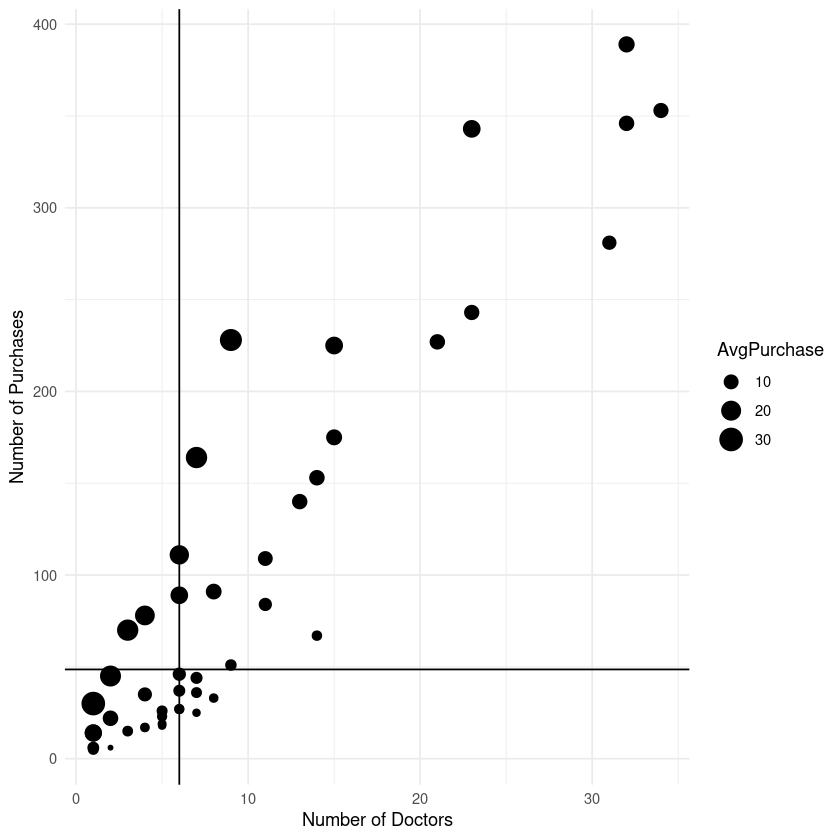

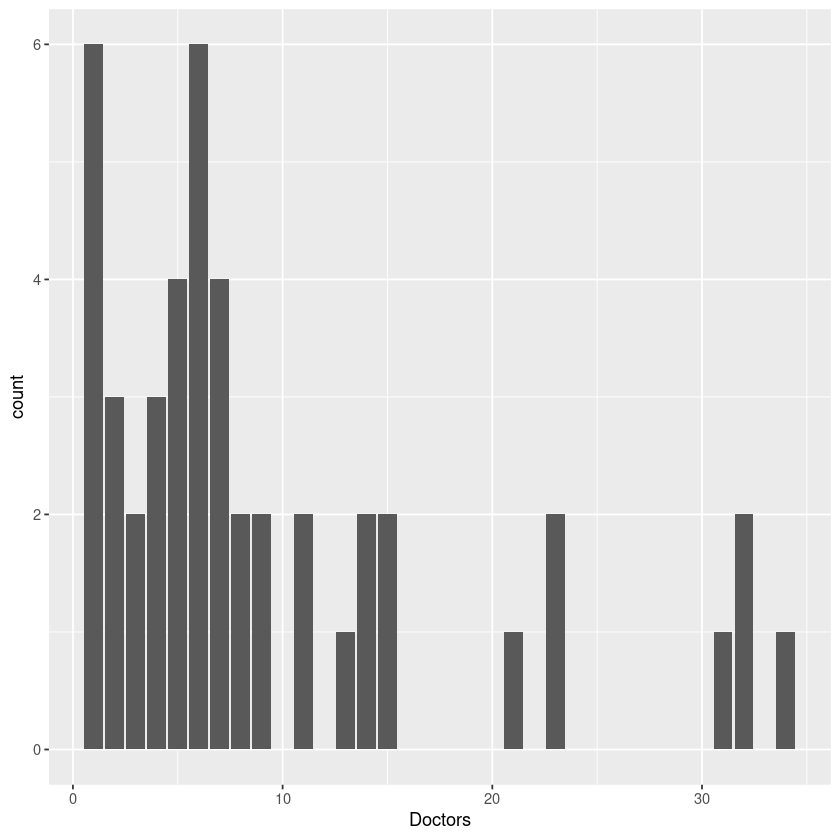

In [12]:
tab1 <- d_Doctors %>% group_by(Region) %>% summarise(Doctors = n(), Purchases = sum(Purchases)) %>% mutate(AvgPurchase = Purchases/Doctors) %>% arrange(desc(Purchases))

tab1
median(tab1$Doctors)
median(tab1$Purchases)

tab1 %>% filter(!Region == "1 19 20") %>% ggplot() + aes(x = Doctors, y = Purchases, size = AvgPurchase) + geom_point() + theme_minimal() + labs(Title = "Palco", x = "Number of Doctors", y = "Number of Purchases") + geom_vline(xintercept = 6, color = "black") + geom_hline(yintercept = 48.6, color= "black")

tab1 %>% ggplot() + aes(x = Doctors) + geom_bar()

## 2. Relationship between purchases and complaints

purchases and complaints

Não há relação, correlação 0.06 # nada ver irmão

363/437 --> 83% dos clientes não reclamaram, que não estão nessa base de 'Doctors', eles tambem nao estao em 'Orders' 

74 de 437 reclamaram (17%)
 --> Dentre os que reclamaram - um cliente pode reclamar de varios tipos - 55 correct (74%), 35 incorrect (47%) e 31 unknown(41%) \
 --> Valores: 147 66 47 \
 --> Medias por doutor: 2,67 | 1,88 | 1,51

In [13]:
summary(d_Doctors)

   DoctorID            Region            Category             Rank          
 Length:437         Length:437         Length:437         Length:437        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 Incidence rate      R rate       Satisfaction       Experience   
 Min.   : 2.05   Min.   :0.000   Min.   :-100.00   Min.   :0.000  
 1st Qu.: 3.00   1st Qu.:0.600   1st Qu.: -12.31   1st Qu.:0.140  
 Median : 4.00   Median :1.000   Median :  39.23   Median :0.380  
 Mean   : 5.05   Mean   :1.099   Mean   :  29.22   Mean   :0.534  
 3rd Qu.: 6.00   3rd Qu.:1.500   3rd Qu.:  83.33 

In [14]:
tab2 <- d_Doctors %>% select(DoctorID, Purchases, Correct, Unknown, Incorrect,`NA`, Specific, `R&R`, NComplaints)
tab2

tab2 %>% select(Purchases,NComplaints) %>% drop_na() %>% cor()
quantile(tab2$NComplaints, seq(0,1,0.1), na.rm = TRUE)

summary(tab2)

DoctorID,Purchases,Correct,Unknown,Incorrect,NA,Specific,R&R,NComplaints
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AHDCBA,49,NA,NA,NA,NA,NA,NA,NA
ABHAHF,38,NA,NA,NA,NA,NA,NA,NA
FDHFJ,34,NA,NA,NA,NA,NA,NA,NA
BJJHCA,29,NA,NA,NA,NA,NA,NA,NA
FJBEA,24,NA,NA,NA,NA,NA,NA,NA
BCJCED,20,NA,NA,NA,NA,NA,NA,NA
FCGIG,19,NA,NA,NA,NA,NA,NA,NA
HFIDE,16,NA,NA,NA,NA,NA,NA,NA
ICBGB,16,NA,NA,NA,NA,NA,NA,NA


,Purchases,NComplaints
Purchases,1.00000000,0.06268015
NComplaints,0.06268015,1.00000000


0%  10%  20%  30%  40%  50%  60%  70%  80%  90% 100% 
 1.0  1.0  1.0  1.0  1.0  2.0  2.8  4.0  6.0  8.7 20.0

   DoctorID           Purchases         Correct          Unknown     
 Length:437         Min.   :  3.00   Min.   : 1.000   Min.   :1.000  
 Class :character   1st Qu.:  4.00   1st Qu.: 1.000   1st Qu.:1.000  
 Mode  :character   Median :  7.00   Median : 2.000   Median :1.000  
                    Mean   : 10.79   Mean   : 2.673   Mean   :1.516  
                    3rd Qu.: 13.00   3rd Qu.: 3.500   3rd Qu.:1.500  
                    Max.   :129.00   Max.   :15.000   Max.   :6.000  
                                     NA's   :382      NA's   :406    
   Incorrect           NA         Specific          R&R       NComplaints    
 Min.   :1.000   Min.   : NA   Min.   :1.000   Min.   :1     Min.   : 1.000  
 1st Qu.:1.000   1st Qu.: NA   1st Qu.:1.500   1st Qu.:1     1st Qu.: 1.000  
 Median :1.000   Median : NA   Median :2.000   Median :1     Median : 2.000  
 Mean   :1.886   Mean   :NaN   Mean   :1.667   Mean   :1     Mean   : 3.595  
 3rd Qu.:3.000   3rd Qu.: NA   3rd Qu.:2.000   3rd

[1] 0.1566908

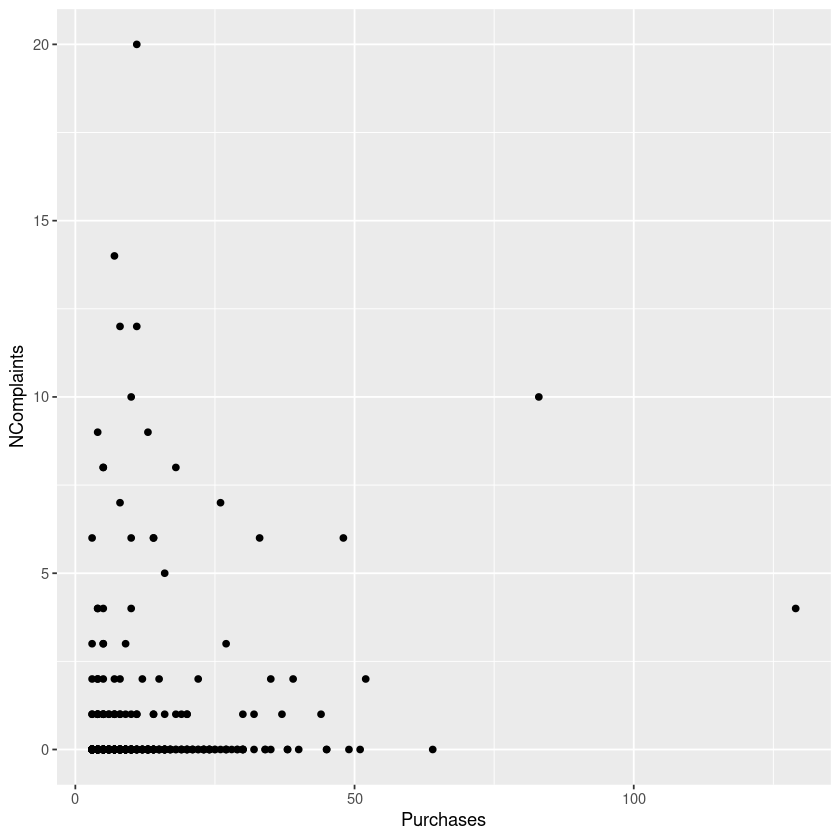

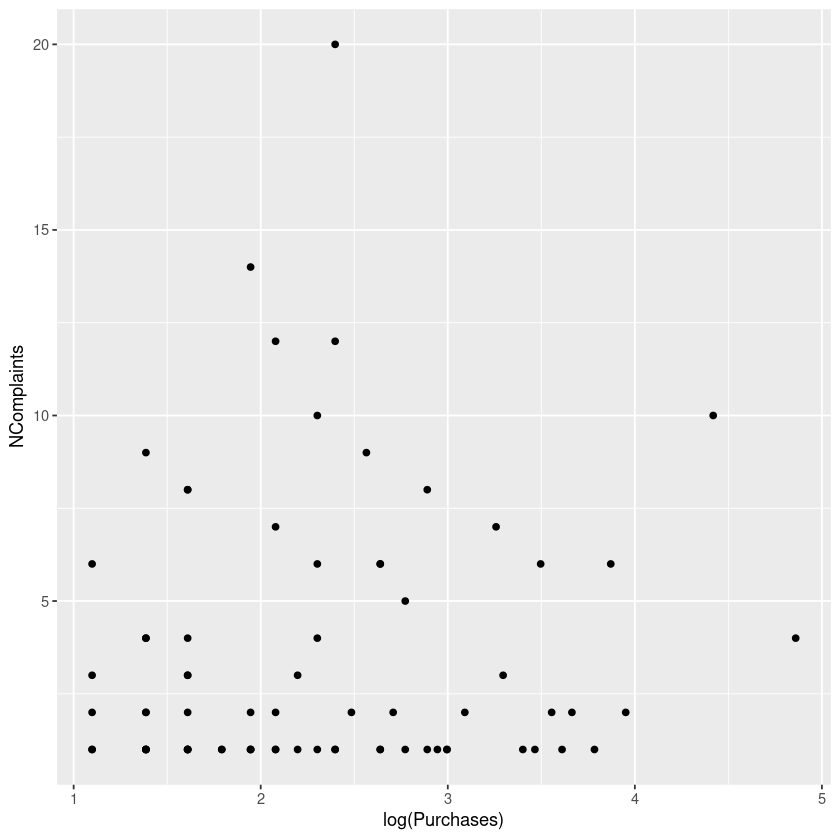

In [43]:
teste <- tab2
teste <- teste %>% mutate(NComplaints = replace_na(NComplaints, 0))

cor(teste$Purchases, teste$NComplaints)

teste %>% ggplot() + aes(x = Purchases, y = NComplaints) + geom_point()
teste %>% filter(NComplaints > 0) %>% ggplot() + aes(x= log(Purchases), y = NComplaints) + geom_point()

In [16]:
tab2_2 <- complaints
outro <- doctors %>% select(DoctorID)
tab2_2 <- inner_join(tab2_2, outro, by = "DoctorID")

tab2_2 %>% group_by(`Complaint Type`) %>% summarise(Doctors = n(), Qty = sum(Qty)) %>% mutate(Avg = Qty/Doctors) %>% arrange(desc(Qty))

Complaint Type,Doctors,Qty,Avg
<chr>,<int>,<dbl>,<dbl>
Correct,55,147,2.672727
Incorrect,35,66,1.885714
Unknown,31,47,1.516129
Specific,3,5,1.666667
R&R,1,1,1.000000


## 3. Define new Doctor segments

to define a new to segment the customers we should go to ...


In [17]:
Doctors_full <- left_join(d_Doctors, d_Orders, by = "DoctorID")
Doctors_full <- Doctors_full %>% mutate(across(11:13, ~ ./NComplaints, na.rm = TRUE)) %>% select(DoctorID, Region, Category, Rank, `Incidence rate`,`R rate`, Satisfaction, Experience, Purchases, Instructions, Correct, Unknown, Incorrect, NComplaints, NOrders, AvgPropConditions, A,B,C,D,F,G,H,I,J)

Doctors_full

DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases,Instructions,⋯,AvgPropConditions,A,B,C,D,F,G,H,I,J
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AHDCBA,4 15,Specialist,Ambassador,49.00,0.90,53.85,1.20,49,Yes,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABHAHF,1 8 T4,General Practitioner,Ambassador,37.00,0.00,100.00,0.00,38,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
FDHFJ,1 9 T4,Specialist,Ambassador,33.00,1.53,NA,0.00,34,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
BJJHCA,1 10 T3,Specialist,Ambassador,28.00,2.03,NA,0.48,29,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
FJBEA,1 14 T4,Specialist,Ambassador,23.00,0.96,76.79,0.75,24,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
BCJCED,1 10,Specialist,Platinum Plus,19.00,1.20,-50.00,0.10,20,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
FCGIG,1 8 T3,Specialist,Titanium,18.00,1.68,NA,0.26,19,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
HFIDE,1 11,Specialist,Ambassador,15.00,1.19,NA,0.38,16,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ICBGB,1 12,Specialist,Platinum Plus,15.00,0.81,NA,0.25,16,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


* Dois approaches: base geral e base com 'dados avançados (orders, complaints, instructions)' \
  --> base total: 437 \
  --> base com alguns dados: 74/76
  --> base completa: 18
 \
 
* é possível clusterizar por orders/conditions
* para clusterizar complaints \
  --> Classificar aqueles sem dados como 'Sem' \
  --> Classificar aqueles com --> TotalCOmplaints/Pedidos \
  							  --> Proporção de cada tipo: juntar outros em um só \
                             \
                              
                              
* Considerando quem tem orders - apenas 74
* Considerando quem tem instrucoes - apenas 76
* Considerando quem tem complaints - apenas 74
* --> quem tem orders são os mesmos que possuem complaints

* 74/437 --> 17% possuem algumas informações extras (considerando apenas essas tabelas individualmente, quando juntar todas possivelmente menos ainda possuirão todas as informações)
                              
                              
** Etapas: clusterizar orders; clusterizar complaints; >> juntar com os demais dados (atribuir unkwnow para aqueles desconhecidos)

In [ ]:
summary(Doctors_full)

   DoctorID            Region            Category             Rank          
 Length:437         Length:437         Length:437         Length:437        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 Incidence rate      R rate       Satisfaction       Experience   
 Min.   : 2.05   Min.   :0.000   Min.   :-100.00   Min.   :0.000  
 1st Qu.: 3.00   1st Qu.:0.600   1st Qu.: -12.31   1st Qu.:0.140  
 Median : 4.00   Median :1.000   Median :  39.23   Median :0.380  
 Mean   : 5.05   Mean   :1.099   Mean   :  29.22   Mean   :0.534  
 3rd Qu.: 6.00   3rd Qu.:1.500   3rd Qu.:  83.33 

### Analisando as variáveis (EDA)


	Welch Two Sample t-test

data:  Purchases by Category
t = -5.6139, df = 211.22, p-value = 6.179e-08
alternative hypothesis: true difference in means between group General Practitioner and group Specialist is not equal to 0
95 percent confidence interval:
 -6.996735 -3.360057
sample estimates:
mean in group General Practitioner           mean in group Specialist 
                          6.442857                          11.621253 


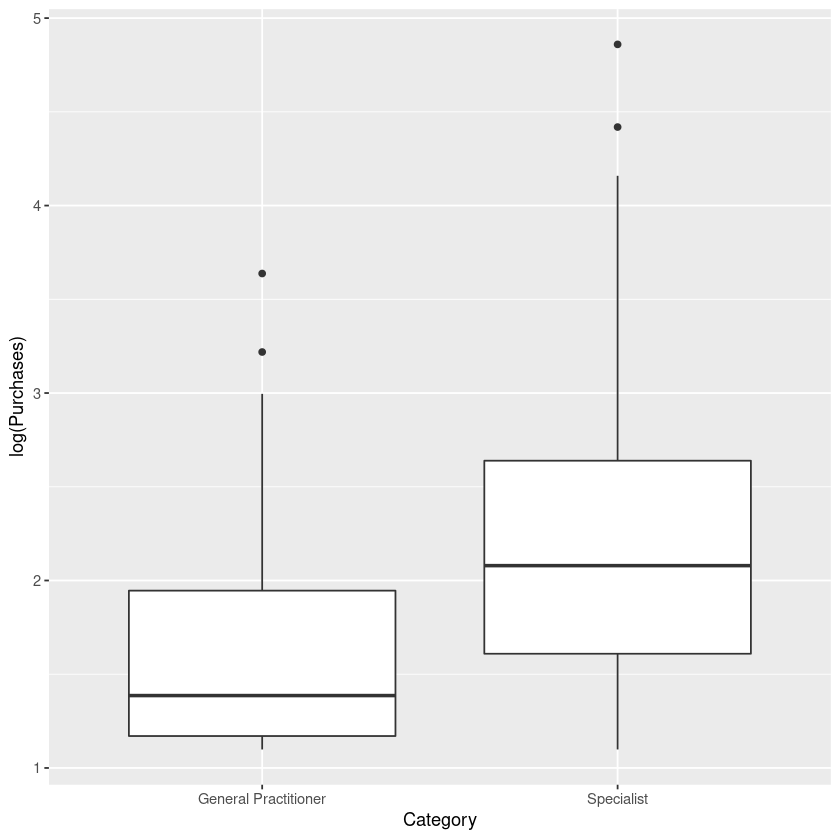

New names:
• `` -> `...1`


Rank,n
<chr>,<int>
Ambassador,115
Platinum,77
Titanium,69
Platinum Plus,54
Gold Plus,50
Silver Plus,44
Gold,22
Silver,3
NA,2


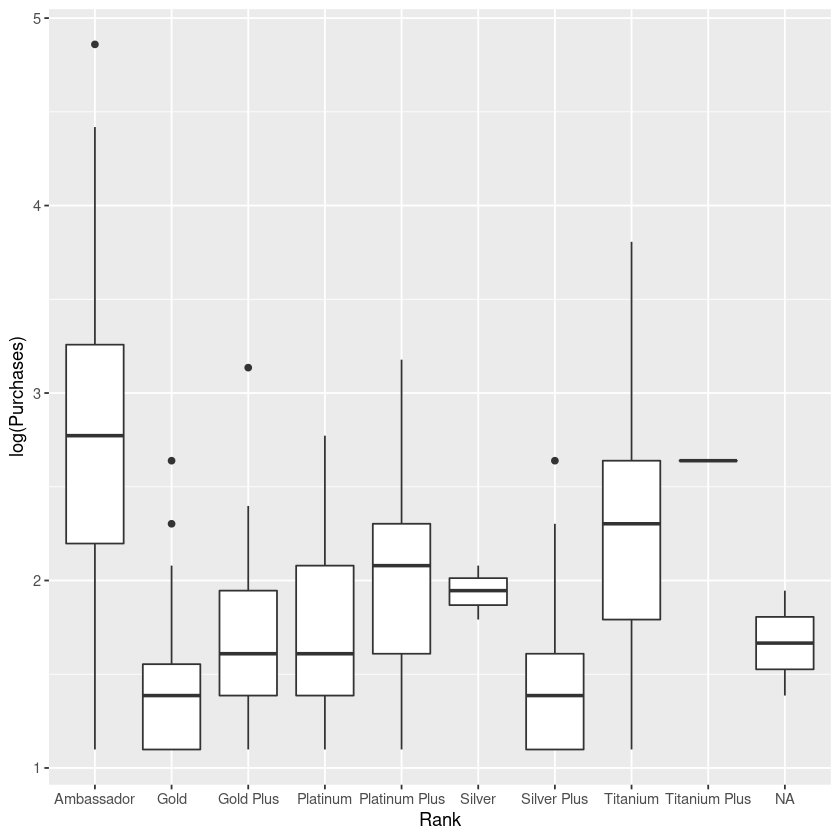

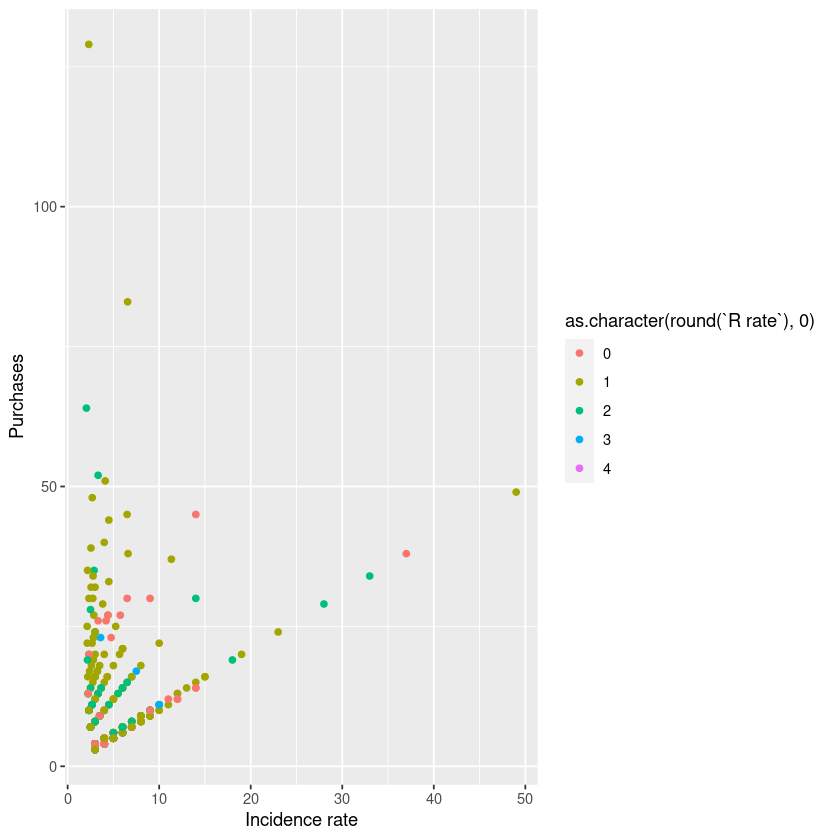

In [19]:
Doctors_full %>% ggplot(aes(x = Category, y = log(Purchases))) + geom_boxplot()
t.test(Purchases ~ Category, data = Doctors_full)
# existe uma clara diferenca entre as categorias

Doctors_full %>% ggplot(aes(x = Rank, y = log(Purchases))) + geom_boxplot()
Doctors_full %>% group_by(Rank) %>% count() %>% arrange(desc(n))
# existe diferenca entre os ranks

Doctors_full %>% ggplot(aes(x = `Incidence rate`, y = Purchases, color = as.character(round(`R rate`),0))) + geom_point()
# Possivelmente uma regressao multinivel

,Incidence rate,R rate,Satisfaction,Experience,Purchases
Incidence rate,1.00000000,-0.12978327,0.05255323,-0.01108059,0.21085408
R rate,-0.12978327,1.00000000,-0.01832078,0.11977912,-0.06643531
Satisfaction,0.05255323,-0.01832078,1.00000000,0.03227282,0.10832240
Experience,-0.01108059,0.11977912,0.03227282,1.00000000,0.01729454
Purchases,0.21085408,-0.06643531,0.10832240,0.01729454,1.00000000


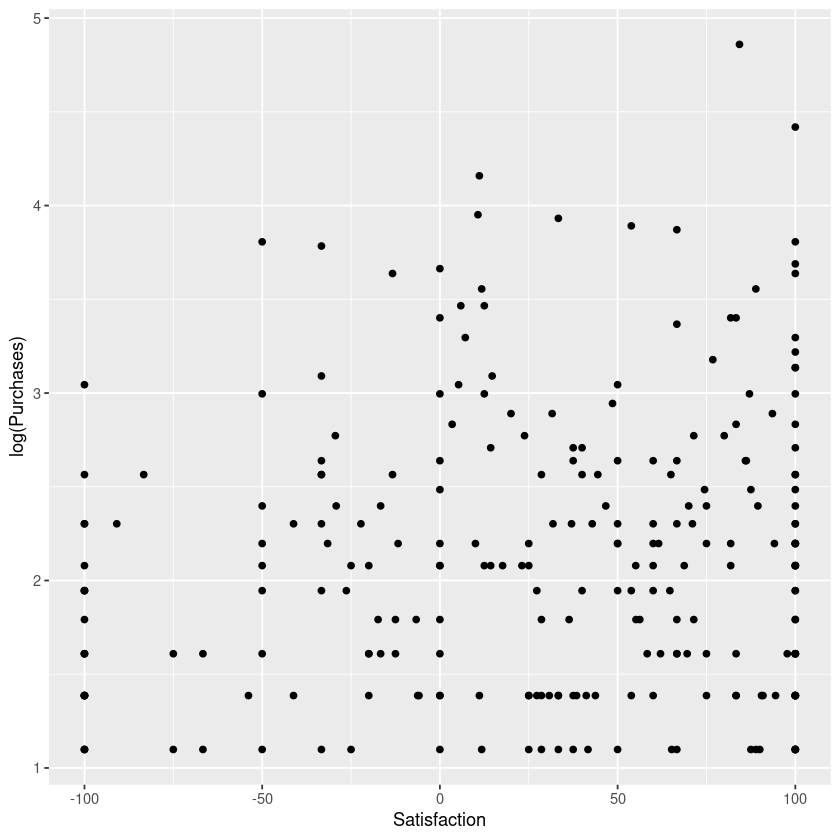

In [45]:
Doctors_full %>% select(5:9) %>% drop_na() %>% cor() # nenhuma correlação expressiva com purchases
Doctors_full %>% select(5:9) %>% drop_na() %>% ggplot(aes(x = Satisfaction, y = log(Purchases))) + geom_point()
# Satisfacao nao e um determinante

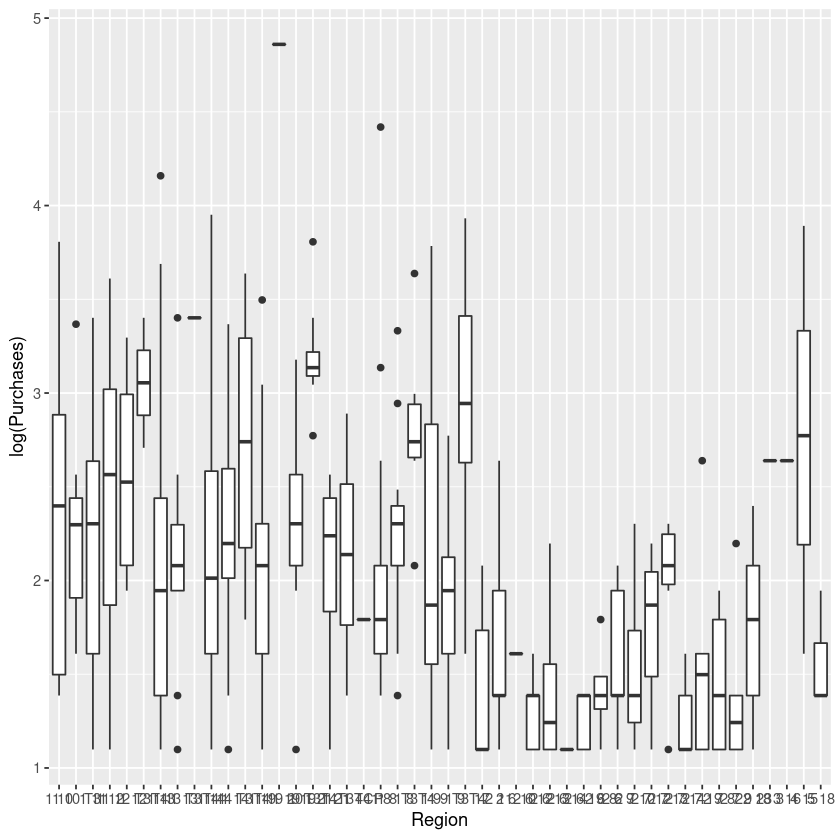

In [21]:
Doctors_full %>% ggplot(aes(x = Region, y = log(Purchases))) + geom_boxplot() # talvez pega ntile da regiao

New names:
• `` -> `...1`


Instructions,n
<chr>,<int>
No,10
Yes,66
NA,361



	Welch Two Sample t-test

data:  Purchases by Instructions
t = -2.5168, df = 45.861, p-value = 0.0154
alternative hypothesis: true difference in means between group No and group Yes is not equal to 0
95 percent confidence interval:
 -14.453225  -1.607381
sample estimates:
 mean in group No mean in group Yes 
          10.0000           18.0303 


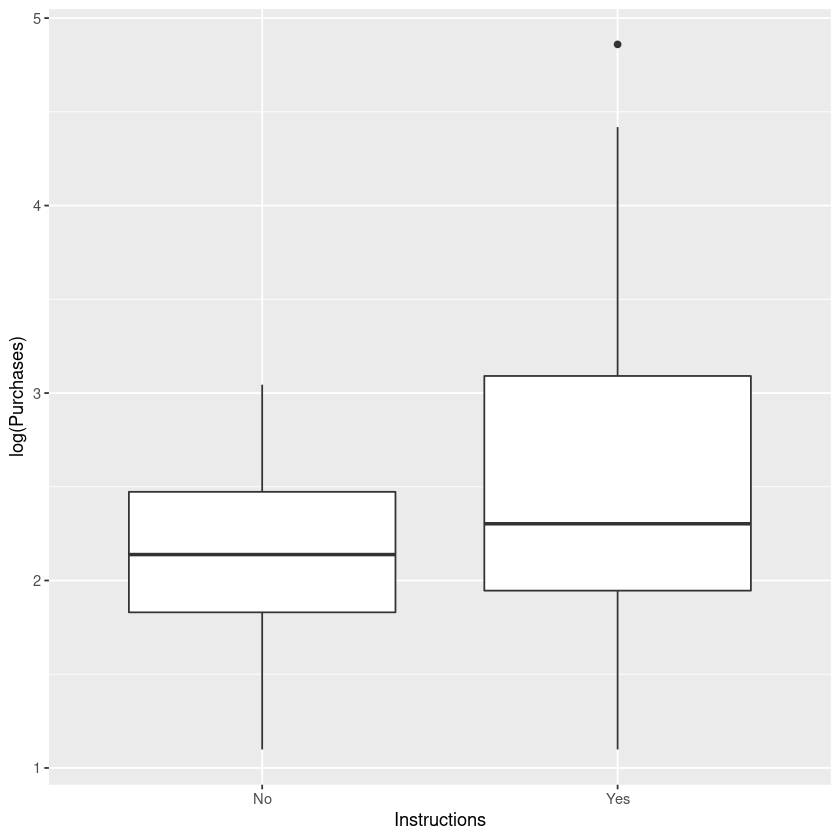

In [22]:
# Instructions
Doctors_full %>% group_by(Instructions) %>% count()

Doctors_full %>% drop_na(Instructions) %>% ggplot(aes(x = Instructions, y = log(Purchases))) + geom_boxplot()
t.test(Purchases ~ Instructions, data = Doctors_full)
## Quem pede instruções tem mais compras; pode trazer problemas devido a baixa amostragem

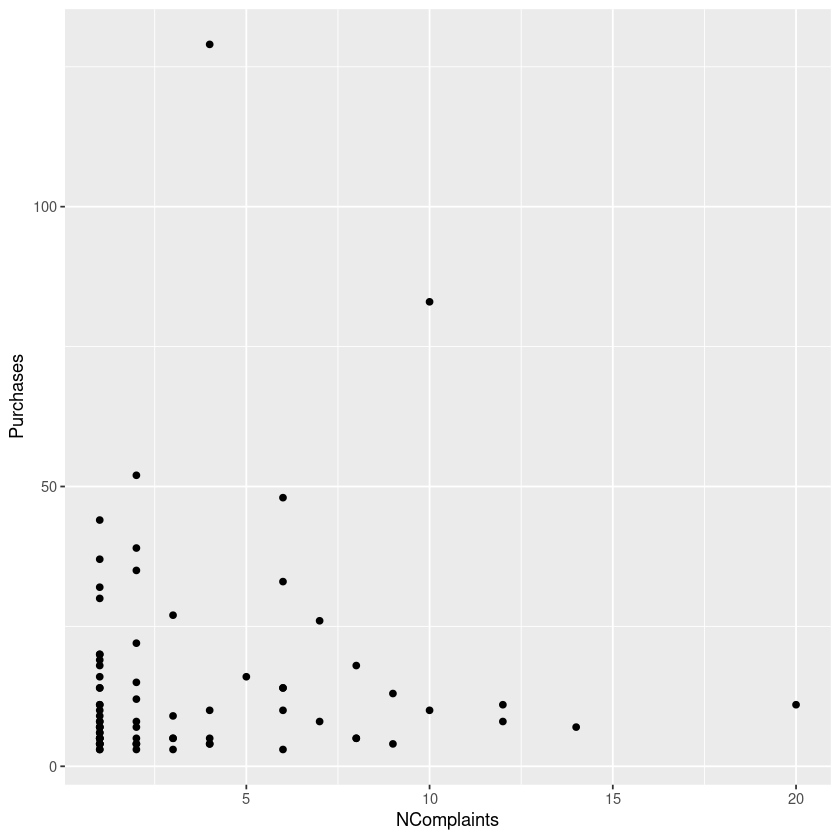

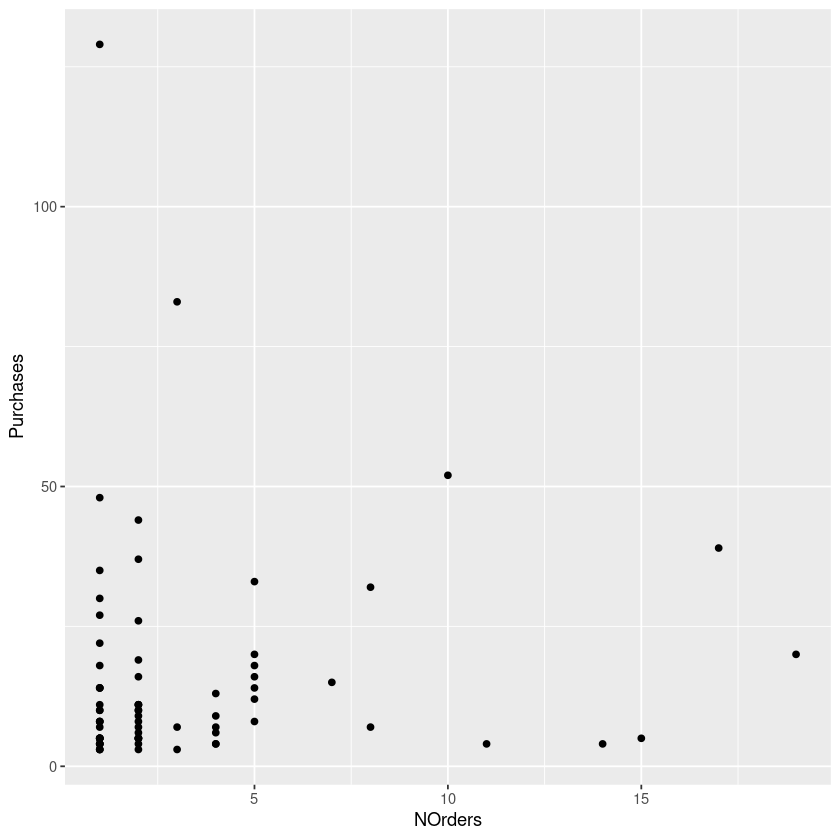

,Purchases,A,B,C,D,F,G,H,I,J
Purchases,1.00000000,0.07713596,0.05070656,-0.02916210,-0.04967234,0.002795440,-0.180053672,-0.14259805,-0.10216705,0.02247289
A,0.07713596,1.00000000,0.40087413,-0.10573067,0.05388681,-0.052028146,-0.178035350,-0.11546761,-0.06738369,-0.08860045
B,0.05070656,0.40087413,1.00000000,0.11583808,0.17239390,-0.058088450,-0.072006219,-0.15307416,0.20789338,-0.03425860
C,-0.02916210,-0.10573067,0.11583808,1.00000000,0.76463699,0.047899342,0.292836913,-0.11302924,-0.09914427,0.01045805
D,-0.04967234,0.05388681,0.17239390,0.76463699,1.00000000,0.039627453,0.243555507,0.01289064,-0.12146978,0.09024385
F,0.00279544,-0.05202815,-0.05808845,0.04789934,0.03962745,1.000000000,0.002060488,0.04169003,-0.04282917,0.12782719
G,-0.18005367,-0.17803535,-0.07200622,0.29283691,0.24355551,0.002060488,1.000000000,0.09354265,0.22843633,0.21447726
H,-0.14259805,-0.11546761,-0.15307416,-0.11302924,0.01289064,0.041690033,0.093542653,1.00000000,-0.08453310,0.39691316
I,-0.10216705,-0.06738369,0.20789338,-0.09914427,-0.12146978,-0.042829167,0.228436333,-0.08453310,1.00000000,0.26654011
J,0.02247289,-0.08860045,-0.03425860,0.01045805,0.09024385,0.127827194,0.214477259,0.39691316,0.26654011,1.00000000


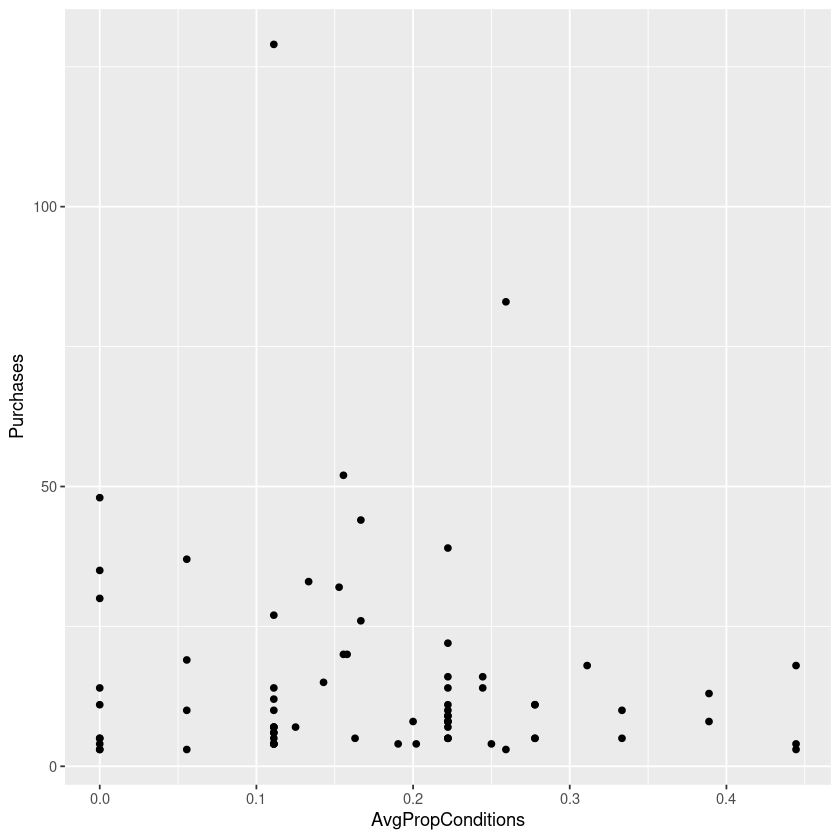

In [23]:
Doctors_full %>% drop_na(NComplaints) %>% ggplot(aes(x = NComplaints, y = Purchases)) + geom_point()
# quanto mais complaints, menos compras - nao tao evidente (padrao a partir de certo valor de complaints)

Doctors_full %>% drop_na(AvgPropConditions) %>% ggplot(aes(x = AvgPropConditions, y = Purchases)) + geom_point()
# Não parece ter relacao

Doctors_full %>% select(9, 17:25) %>% drop_na() %>% cor()
# Nao tem relacao